### 1. Import Dependencies and set up machine

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

print(tf.__version__)

2.5.0


If memory growth is enabled for a PhysicalDevice, the runtime initialization will not allocate all memory on the device. Memory growth cannot be configured on a PhysicalDevice with virtual devices configured. Limits memory usage on the GPU of the TF.

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

### 2. Remove dodgy images

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data'

In [6]:
os.listdir(os.path.join(data_dir, 'happy'))

['happy-people-secrets.jpg',
 'images296.jpg',
 'images282.jpg',
 'images32.jpg',
 'images269.jpg',
 '05-12-21-happy-people.jpg',
 'image22.jpeg',
 'happy.jpg',
 'images137.jpg',
 'images335.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'images308.jpg',
 'images320.jpg',
 'images122.jpg',
 'happy-people-getty-10.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 'images27.jpg',
 'images254.jpg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'friends-happy-190821.jpg',
 'images295.jpg',
 'images31.jpg',
 'images25.jpg',
 'shutterstock_736997836-1.jpg',
 'images19.jpg',
 'pexels-photo-1999504.jpeg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'images134.jpg',
 'images108.jpg',
 'o-HAPPY-facebook.jpg',
 'images121.jpg',
 'dad02f36-cd62d444d9371610VgnVCM100000d7c1a8c0____-hands.jpg',
 'happy-people-13772392.jpg',
 'images257.jpg',
 'images280.jpg',
 'imag

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [9]:
img = cv2.imread(os.path.join('data','happy','8e06de1bf2171da2312b6de61c61e4bc.jpg'))

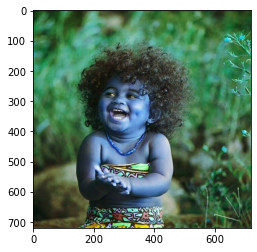

In [10]:
plt.imshow(img)

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### 3. Load Data

The Dataset API allows you to build an asynchronous, highly optimized data pipeline to prevent your GPU from data starvation. It loads data from the disk (images or text), applies optimized transformations, creates batches and sends it to the GPU. (Better for GPU optimization)

The tf.data API makes it possible to handle large amounts of data, read from different data formats, and perform complex transformations.

In [12]:
tf.keras.preprocessing.image_dataset_from_directory??

This util class helps us rezise images in (256,256), configures batch size to 32, shuffles the data etc.

In [13]:
# Creating the Data pipeline
data = tf.keras.preprocessing.image_dataset_from_directory('data')

Found 465 files belonging to 2 classes.
Metal device set to: Apple M1


2022-05-21 13:10:48.641439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-21 13:10:48.642114: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


This is gonna help fetch the data as a generator

In [14]:
# Allowing us to loop through it
data_iterator = data.as_numpy_iterator()

In [15]:
# Ascessing the data pipeline
data_iterator

In [16]:
batch = data_iterator.next()
# Every time we run this we get a new batch of images

2022-05-21 13:10:48.707666: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-21 13:10:48.708824: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [17]:
# Images represented as numpy arrays
batch[0]

array([[[[140.        , 189.        ,   1.        ],
         [140.        , 189.        ,   1.        ],
         [140.        , 189.        ,   1.        ],
         ...,
         [115.        , 154.        ,   1.        ],
         [114.99632   , 153.99632   ,   0.99632263],
         [114.        , 153.        ,   0.        ]],

        [[140.        , 189.        ,   1.        ],
         [140.        , 189.        ,   1.        ],
         [140.        , 189.        ,   1.        ],
         ...,
         [115.        , 154.        ,   1.        ],
         [114.        , 153.        ,   0.        ],
         [114.        , 153.        ,   0.        ]],

        [[140.        , 189.        ,   1.        ],
         [140.        , 189.        ,   1.        ],
         [140.        , 189.        ,   1.        ],
         ...,
         [114.        , 153.        ,   0.        ],
         [114.        , 153.        ,   0.        ],
         [114.        , 153.        ,   0.        ]],

In [18]:
# Labels - 1 or 0 would represent happy or sad == 0 - happy, 1 - sad
batch[1]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

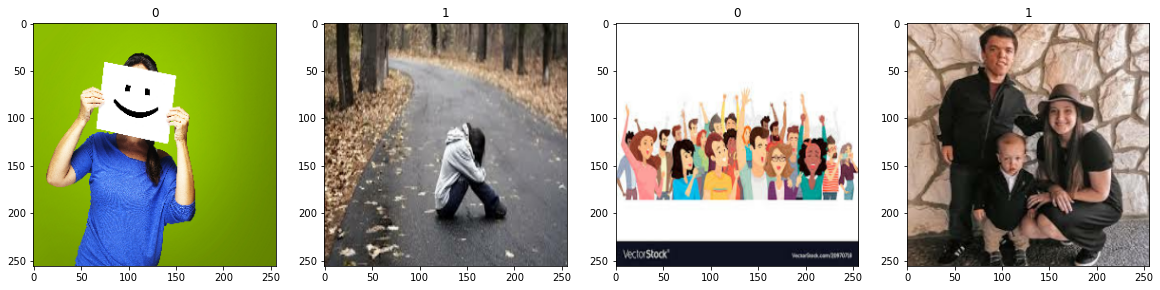

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


### 4. Preprocessing Data

As of now the images are in 256,256 -> (0,255 pixels) its good to scale to 0,1

In [20]:
# When we get our batch we get images plus labels. X = images, y = lebels
# Here we are going to divide the images (x) by 255 and nothing to y
data = data.map(lambda x,y: (x/255, y))

In [21]:
scaled_iterator = data.as_numpy_iterator()

In [22]:
batch = scaled_iterator.next()

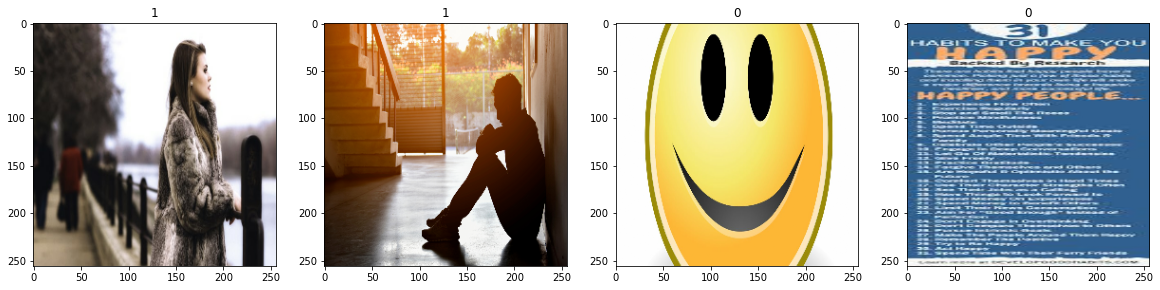

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 5. Split data

In [24]:
len(data)

15

In [25]:
# 70 percent of the data
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [26]:
train_size+test_size+val_size

15

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### 6. Build deep neural network

These are filters (stuff that the image is multiplied so features within images would come forward and you can spot said features). The filters are LEARNED like other parameters in the neurons.
1. As our image is feed into the convolutional layer, a number of randomly initialized filters will pass over the image
2. Over time the filters that give us the image outputs that give the best matches will be learned. This is called feature extraction.
Filters are just multipliers - Conv2D

Pooling: which groups up the pixels in the image and filters them down to a subset. MaxPooling 2x2 will group the image into 2x2 pixel sections, and simply pick the largest pixel value. This will leave an image a quarter of the size and its features can be enhanced.

In [44]:
model = Sequential([
    # 32 filters, 3x3 pixel size, moves 1 pixel over (stride)
    tf.keras.layers.Conv2D(32,(3,3), 1, activation="relu", input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),1, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                  
])

In [46]:
model.compile(optimizer='adam',loss='BinaryCrossEntropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)            

### Train

In [51]:
logdir = 'logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

2022-05-22 15:50:01.188320: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-05-22 15:50:01.188341: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-05-22 15:50:01.189376: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [70]:
history = model.fit(train,
                    validation_data=val,
                    epochs=20,
                    verbose=0,
                    callbacks=[tensorboard_callback])


ValueError: in user code:

    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:187 __call__
        self.build(y_pred)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:136 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/util/nest.py:867 map_structure
        structure[0], [func(*x) for x in entries],
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/util/nest.py:867 <listcomp>
        structure[0], [func(*x) for x in entries],
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:276 _get_loss_object
        loss = losses_mod.get(loss)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:2078 get
        return deserialize(identifier)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:2033 deserialize
        return deserialize_keras_object(
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:698 deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: BinaryCrossEntropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
